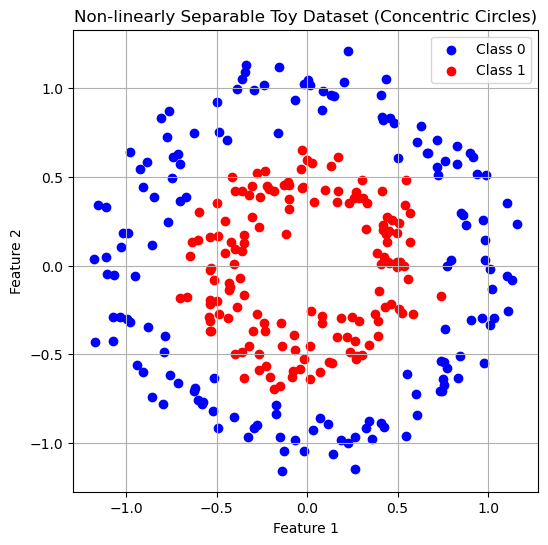

In [1]:
#Q1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate toy data: Concentric circles (non-linearly separable)
X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)

# Scatter plot of the data
plt.figure(figsize=(6, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], c='blue', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='red', label='Class 1')
plt.title("Non-linearly Separable Toy Dataset (Concentric Circles)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

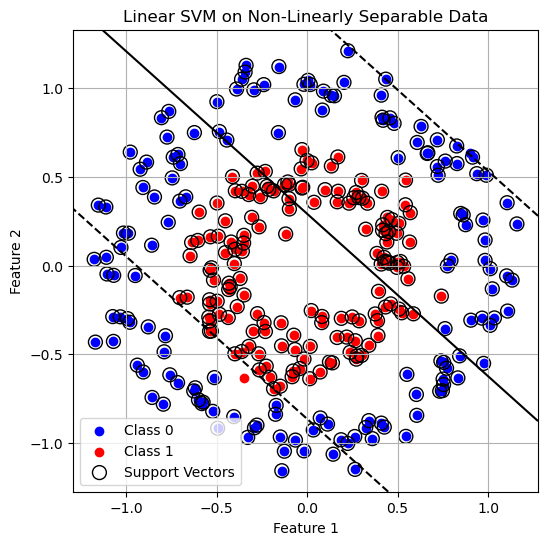

Accuracy of linear SVM: 0.54


In [5]:
#Q2 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# Step 1: Generate the same non-linearly separable data
X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)

# Step 2: Train a linear SVM (kernel='linear')
clf = SVC(kernel='linear', C=1)
clf.fit(X, y)

# Step 3: Plot decision boundary and support vectors
def plot_decision_boundary(clf, X, y):
    plt.figure(figsize=(6,6))
    
    # Plot the points
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], c='blue', label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='red', label='Class 1')
    
    # Plot support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='black', label='Support Vectors')

    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                         np.linspace(ylim[0], ylim[1], 500))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Decision boundary and margins
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')

    plt.title("Linear SVM on Non-Linearly Separable Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(clf, X, y)

# Performance metrics
predictions = clf.predict(X)
accuracy = np.mean(predictions == y)
print("Accuracy of linear SVM: {:.2f}".format(accuracy))



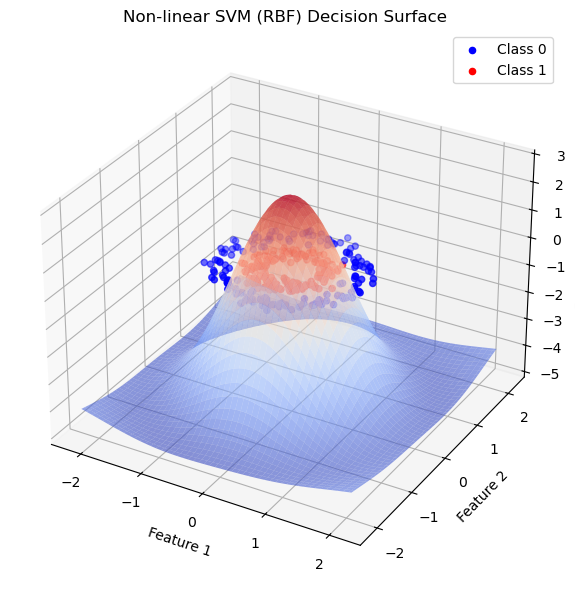

In [6]:
#Q3
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# 1. Veriyi tekrar üretelim
X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)

# 2. RBF kernel ile SVM eğitimi
clf_rbf = SVC(kernel='rbf', C=1, gamma='auto')
clf_rbf.fit(X, y)

# 3. 3D karar yüzeyini çizmek
# Grid oluştur
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
zz = clf_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)

# 4. 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Noktaları z=0 düzlemine çiz
ax.scatter(X[y == 0, 0], X[y == 0, 1], 0, color='blue', label='Class 0')
ax.scatter(X[y == 1, 0], X[y == 1, 1], 0, color='red', label='Class 1')

# Karar yüzeyi
ax.plot_surface(xx, yy, zz, cmap='coolwarm', alpha=0.6)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Decision Score')
ax.set_title('Non-linear SVM (RBF) Decision Surface')
plt.legend()
plt.tight_layout()
plt.show()

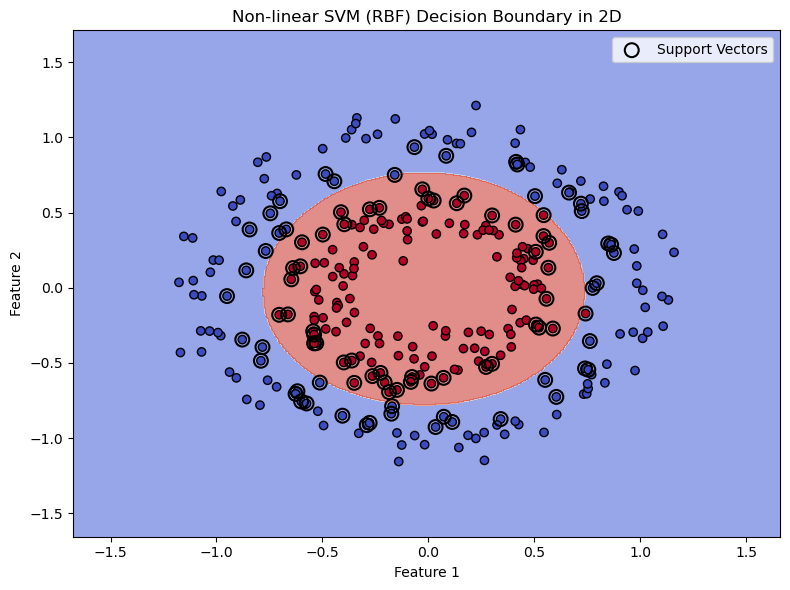

In [7]:
#Q4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# 1. Veri üretimi
X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)

# 2. Non-linear SVM (RBF kernel)
clf_rbf = SVC(kernel='rbf', C=1, gamma='auto')
clf_rbf.fit(X, y)

# 3. Meshgrid oluştur
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 4. Karar sınırlarını çiz
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.scatter(clf_rbf.support_vectors_[:, 0],
            clf_rbf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', linewidths=1.5,
            label='Support Vectors')
plt.title("Non-linear SVM (RBF) Decision Boundary in 2D")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.tight_layout()
plt.show()